In [2]:
#THIS IS SHAN'S BRANCH
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy.optimize import curve_fit
import random
import seaborn as sns


path1='../Cleaned_Data/Clearned_Original_Data'
path2='../Cleaned_Data/Original_Data_That_Contains_Critic_rating_Only'
path3='../Cleaned_Data/Original_Data_That_Contains_User_info_Only'

def Per(x):
        return "{:.2%}".format(x)

In [3]:
Odf=pd.read_csv(path1)
Cdf=pd.read_csv(path2)
Udf=pd.read_csv(path3)

In [31]:
Odf=Odf[['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales','Global_Sales']]
Odf=Odf.dropna(how='any')
Odf['Year_of_Release']=Odf['Year_of_Release'].astype(int)
Odf.head()
Odf=Odf.sort_values(by='Global_Sales',ascending=False)
Odf

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,31.37
...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.01
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.01
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.01


In [5]:
gendf=Odf.groupby('Genre')
Ana=gendf.sum().sort_values(by='NA_Sales',ascending=False)
Ana['NA_Percentage']=Ana['NA_Sales']/Ana['Global_Sales']
Ana=Ana.sort_values(by='NA_Percentage',ascending=False)
Ana['NA_Percentage']=Ana['NA_Percentage'].apply(Per)
Ana=Ana[['NA_Sales','Global_Sales','NA_Percentage']]
Ana.to_csv('Output_Data/NA_Genre_Preference.csv')
Ana

,NA_Sales,Global_Sales,NA_Percentage
Genre,,,
Shooter,584.83,1041.83,56.13%
Platform,444.44,825.86,53.82%
Sports,671.20,1310.39,51.22%
Puzzle,121.13,240.33,50.40%
Misc,394.01,783.19,50.31%
Action,863.17,1717.62,50.25%
Fighting,220.51,442.63,49.82%
Racing,356.86,723.69,49.31%
Simulation,180.67,388.22,46.54%


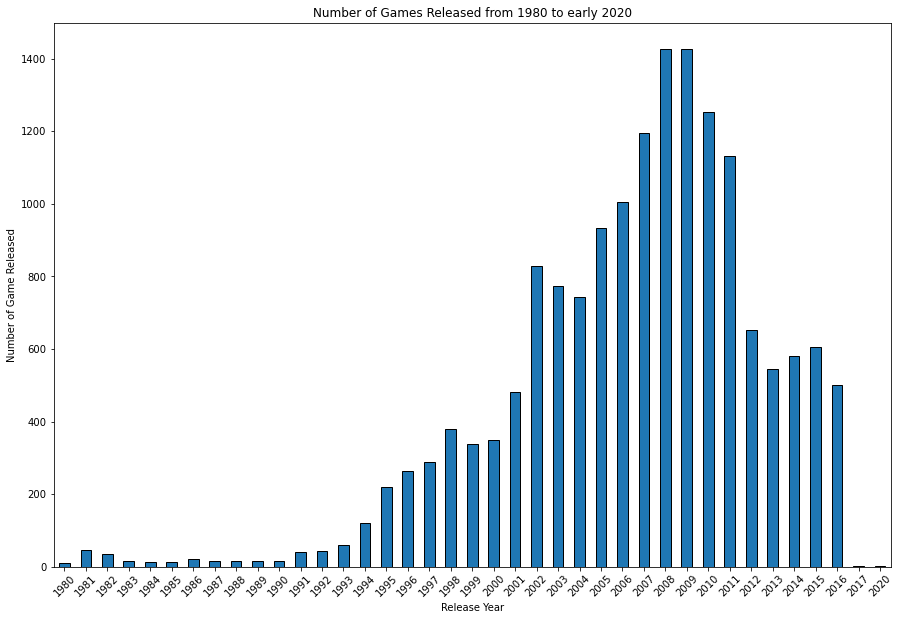

In [6]:

#Summary
Grouped=Odf.groupby('Year_of_Release')['Name'].count()
Grouped.plot(kind='bar',figsize=(15,10),xlabel='Release Year',ylabel='Number of Game Released',title='Number of Games Released from 1980 to early 2020',edgecolor='black')
plt.xticks(rotation=45)
plt.savefig('Output_Data/Number of Games Released from 1980 to early 2020.png')
plt.show()

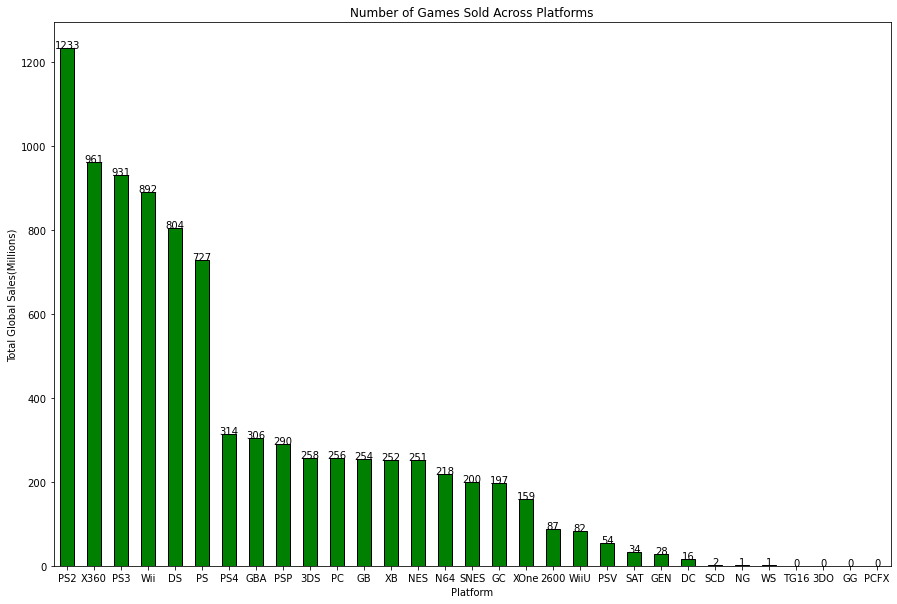

In [7]:
#Global Sale Across Platform
Grouped_Plat=Odf.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
Grouped_Plat.plot(kind='bar',figsize=(15,10),xlabel='Platform',ylabel='Total Global Sales(Millions)',title='Number of Games Sold Across Platforms',color='g',edgecolor='black')
y=Grouped_Plat.to_list()
plt.xticks(rotation=0)

for i in range(len(Odf['Platform'].unique())):
        plt.text(i, y[i], round(y[i]), ha = 'center')
plt.savefig('Output_Data/Number of Games Released Sold Across Platforms.png')
plt.show()

In [8]:
#Get Platform Life Span
grouped_Plat=Odf.groupby('Platform')
platform_Life=grouped_Plat['Year_of_Release'].value_counts()

platform=[]
life=[]
for index in platform_Life.items():
     if index[0][0] in platform:
         life[platform.index(index[0][0])]+=1
     else:
         platform.append(index[0][0])
         life.append(0)

plat_life=pd.DataFrame({'Platform':platform,'Total Life':life})
plat_life=plat_life.sort_values(by='Total Life')
max_life=plat_life['Total Life'].max()
min_life=plat_life['Total Life'].min()
avg_life=plat_life['Total Life'].mean()
plat_life


,Platform,Total Life
9,GG,0
14,PCFX,0
24,TG16,0
1,3DO,1
22,SCD,1
25,WS,2
12,NG,3
30,XOne,3
8,GEN,4
18,PS4,4


In [9]:
#Get More Recent Data
Recent_df=Odf.loc[Odf['Year_of_Release']>1999]
plat_df=pd.crosstab(Recent_df['Platform'], Recent_df['Year_of_Release'],margins=True, margins_name="total").sort_values(by='total', ascending=False)
plat_df


Year_of_Release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,total
Platform,,,,,,,,,,,,,,,,,,,,
total,350,482,829,775,743,934,1006,1196,1427,1426,1253,1133,653,544,581,606,500,3,1,14442
PS2,82,185,280,256,259,260,259,214,191,96,38,7,0,0,0,0,0,0,0,2127
DS,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,0,1,2121
PS3,0,0,0,0,0,0,27,90,138,162,181,215,148,126,108,73,38,0,0,1306
Wii,0,0,0,0,0,0,44,185,282,325,253,143,31,12,6,4,1,0,0,1286
X360,0,0,0,0,0,18,93,123,146,172,182,206,106,75,63,35,13,0,0,1232
PSP,0,0,0,0,15,95,189,133,100,161,188,139,106,54,10,3,0,0,0,1193
PC,7,15,19,33,30,37,52,62,76,107,88,136,61,38,47,50,54,0,0,912
XB,1,33,158,189,177,179,62,3,1,0,0,0,0,0,0,0,0,0,0,803


In [10]:
glob_by_plat=grouped_Plat['Global_Sales'].sum().to_frame('Global_Sales')
glob_by_plat=glob_by_plat.sort_values(by='Global_Sales')
sum_pd=pd.merge(plat_life,glob_by_plat,on='Platform')
sum_pd

,Platform,Total Life,Global_Sales
0,GG,0,0.04
1,PCFX,0,0.03
2,TG16,0,0.16
3,3DO,1,0.10
4,SCD,1,1.87
5,WS,2,1.42
6,NG,3,1.44
7,XOne,3,159.44
8,GEN,4,28.36
9,PS4,4,314.23


The r-value is 0.5109689349373417


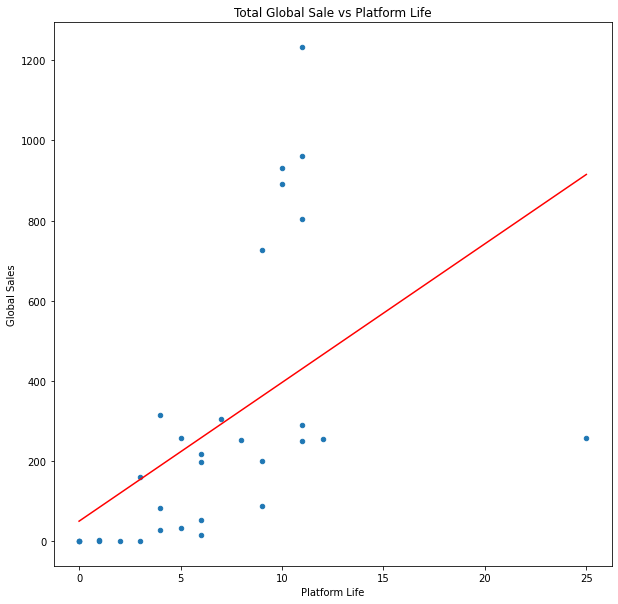

In [11]:
#Do a scatter plot between total life and global sale
sum_pd.plot(x='Total Life',y='Global_Sales',kind='scatter',title='Total Global Sale vs Platform Life',xlabel='Platform Life',ylabel='Global Sales',figsize=(10,10))
x=sum_pd['Total Life']
y=sum_pd['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.xlabel('Platform Life')
plt.ylabel('Global Sales')
print(f'The r-value is {rvalue}')
plt.savefig('Output_Data/Total Global Sale vs Platform Life.png')
plt.show()

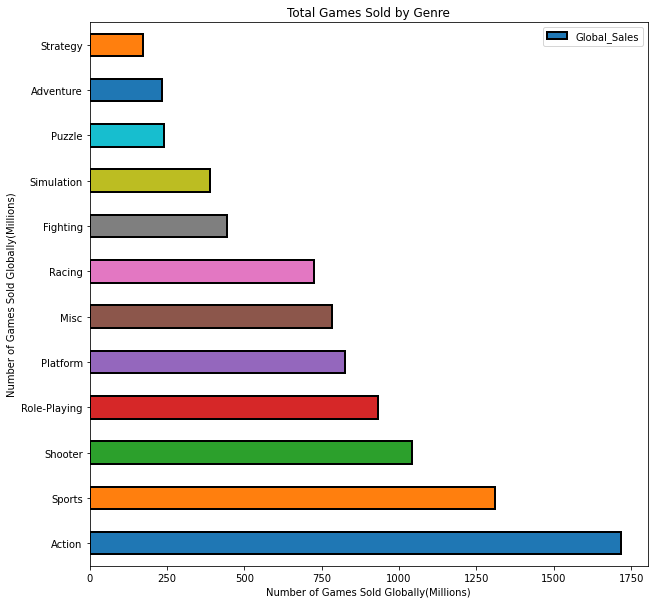

In [12]:
group_genre=Odf.groupby('Genre')
group_genre=group_genre.sum().sort_values(by='Global_Sales',ascending=False).reset_index()
palette = sns.color_palette(None, len(group_genre))
group_genre.plot(kind='barh',x='Genre',y='Global_Sales',xlabel='Number of Games Sold Globally(Millions)',color=palette,figsize=(10,10),edgecolor='black',linewidth=2,title='Total Games Sold by Genre')
plt.xlabel('Number of Games Sold Globally(Millions)')
plt.savefig('Output_Data/Total Games Sold by Genre.png')
plt.show()

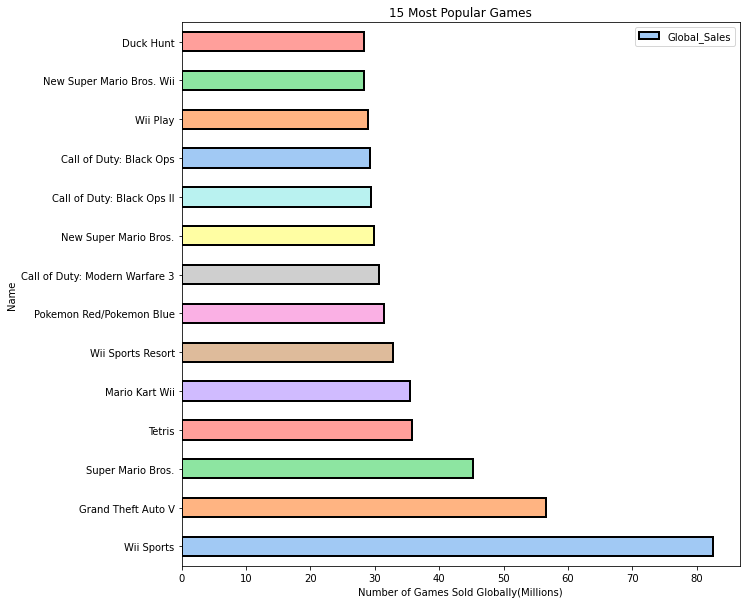

In [13]:
Name=Odf.groupby('Name')
Name=Name.sum().sort_values(by='Global_Sales',ascending=False)
Name=Name.reset_index()
Name=Name[['Name','Global_Sales']]
palette = sns.color_palette("pastel", len(Name))
Name.iloc[0:14,:].plot(kind='barh',x='Name',y='Global_Sales',figsize=(10,10),color=palette,edgecolor='black',linewidth=2,legend='Name',title='15 Most Popular Games')
name=Name['Name'].tolist()
plt.xlabel('Number of Games Sold Globally(Millions)')
plt.savefig('Output_Data/15 Most Popular Games.png')
plt.show()

In [14]:
Cdf=Cdf[['Name','Global_Sales','NA_Sales','Critic_Score']]

The r-value is 0.275315592347612


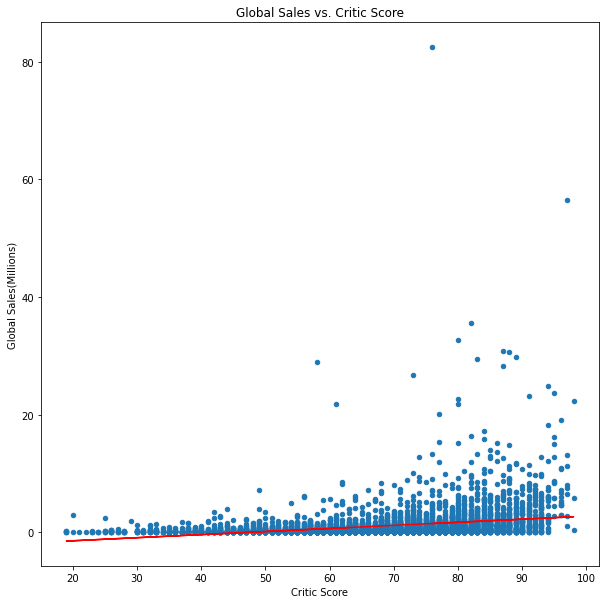

,Name,Global_Sales,NA_Sales,Critic_Score,Total Global
2239,SoulCalibur,0.34,0.00,98.0,0.34
136,Tony Hawk's Pro Skater 2,4.68,3.05,98.0,5.86
27,Grand Theft Auto IV,11.01,6.76,98.0,22.39
55,Super Mario Galaxy 2,7.51,3.56,97.0,7.51
26,Super Mario Galaxy,11.35,6.06,97.0,11.35
...,...,...,...,...,...
3645,Rugby 15,0.11,0.04,19.0,0.20
4376,Ride to Hell,0.06,0.04,19.0,0.10
2832,Nickelodeon Party Blast,0.22,0.16,19.0,0.22
4892,Balls of Fury,0.02,0.02,19.0,0.04


In [15]:
Gdf=Cdf.groupby('Name')
Sum=Gdf['Global_Sales'].sum().to_frame('Total Global')
Cdf=Cdf.drop_duplicates(subset=['Name'])
Completedf=pd.merge(Cdf,Sum,on='Name')
Completedf.plot(kind='scatter',x='Critic_Score',y='Total Global',figsize=(10,10),title='Global Sales vs. Critic Score',xlabel='Critic Score',ylabel='Global Sales')
x=Completedf['Critic_Score']
y=Completedf['Total Global']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales(Millions)")
print(f'The r-value is {rvalue}')
plt.savefig('Output_Data/Global Sales vs. Critic Score.png')
plt.show()
Completedf=Completedf.sort_values(by='Critic_Score',ascending=False)
Completedf

The r-value is 0.08813917279231206


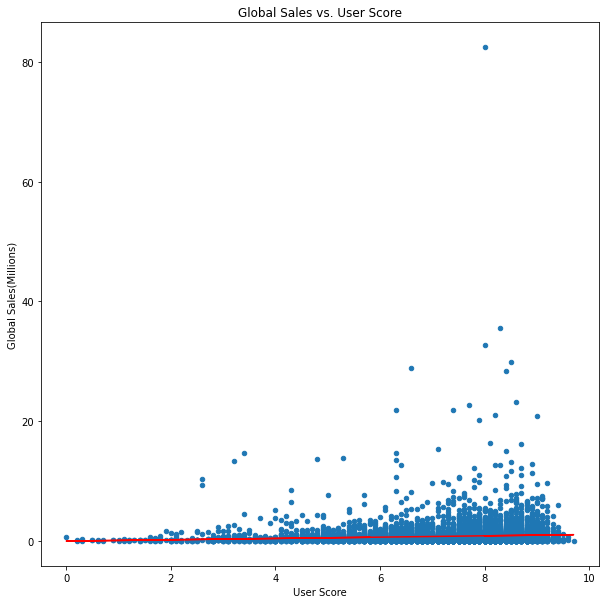

In [16]:
Udf=Udf[['Name','Global_Sales','User_Score','User_Count']]
Udf.plot(kind='scatter',x='User_Score',y='Global_Sales',figsize=(10,10),title='Global Sales vs. User Score')
x=Udf['User_Score']
y=Udf['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.xlabel("User Score")
plt.ylabel("Global Sales(Millions)")
plt.savefig('Output_Data/Global Sales vs. User Score.png')
plt.show()


The r-value is 0.2650115243744528


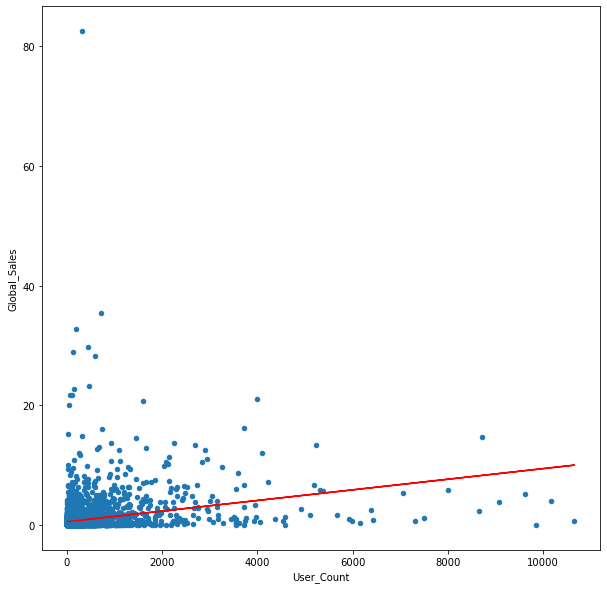

In [17]:
Udf.plot(kind='scatter',x='User_Count',y='Global_Sales',figsize=(10,10))
x=Udf['User_Count']
y=Udf['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.show()

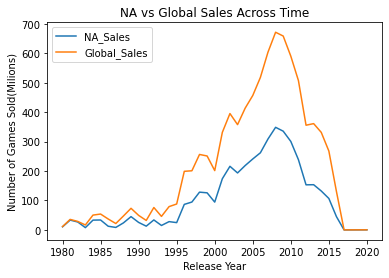

In [18]:
# plt.plot(Odf['Year_of_Release'],Odf['NA_Sales'])
Grouped1=Odf.groupby('Year_of_Release').sum().reset_index()
Grouped1.plot(kind='line',x='Year_of_Release',y=['NA_Sales','Global_Sales'],title='NA vs Global Sales Across Time')
plt.savefig('Output_Data/NA vs Global Sales Across Time.png')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Sold(Milions)')
plt.show()

The r-value is 0.9926243084488494


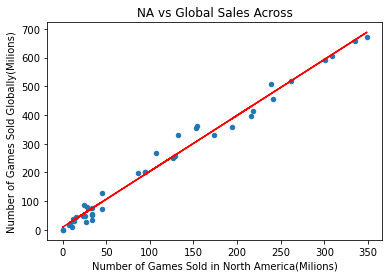

In [19]:
Grouped1.plot(kind='scatter',x='NA_Sales',y='Global_Sales',title='NA vs Global Sales Across')
x=Grouped1['NA_Sales']
y=Grouped1['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.xlabel('Number of Games Sold in North America(Milions)')
plt.ylabel('Number of Games Sold Globally(Milions)')
plt.savefig('Output_Data/NA vs Global Sales.png')
plt.show()

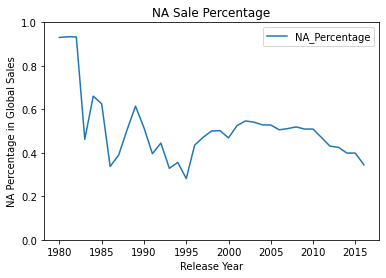

In [20]:
Grouped1['NA_Percentage']=(Grouped1['NA_Sales']/Grouped1["Global_Sales"])
Grouped1=Grouped1.loc[Grouped1['Year_of_Release']<2017]
Grouped1.plot(kind='line',x='Year_of_Release',y="NA_Percentage",title='NA Sale Percentage')
plt.xlabel('Release Year')
plt.ylabel('NA Percentage in Global Sales')
plt.ylim(0,1)
plt.savefig('Output_Data/NA Sale Percentage.png')
plt.show()


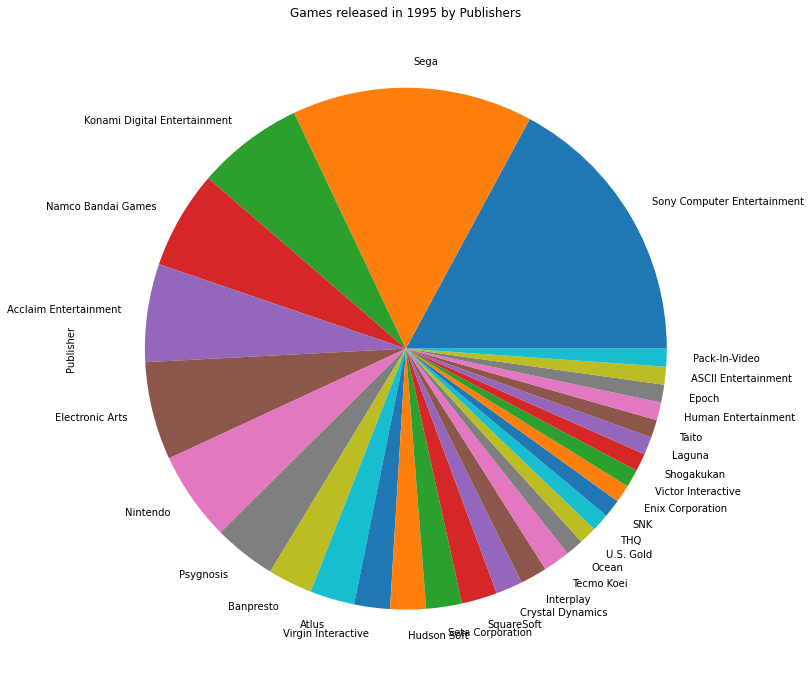

In [21]:
lgame=Odf.loc[Odf['Year_of_Release']==1995]
plat=lgame['Publisher'].value_counts()
plat=plat.iloc[0:30]
plat.plot(kind='pie',figsize=(12,12),title='Games released in 1995 by Publishers')
lgame.head(5).to_csv('Output_Data/1995 top 5 games.csv')
plt.savefig('Output_Data/Games released in 1995 by Publishers.png')
plt.show()


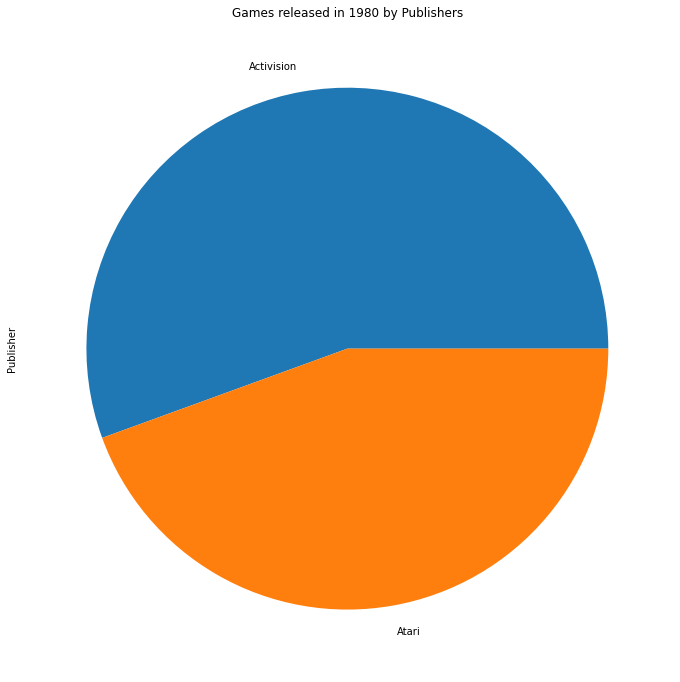

In [22]:
lgame=Odf.loc[Odf['Year_of_Release']==1980]
plat=lgame['Publisher'].value_counts()
plat.plot(kind='pie',figsize=(12,12),title='Games released in 1980 by Publishers')
lgame.head(5).to_csv('Output_Data/1980 top 5 games.csv')
plt.savefig('Output_Data/Games released in 1980 by Publishers.png')

In [23]:
path4="../Data/Video_Games_Sales.csv"
Fdf=pd.read_csv(path4)
Fdf=Fdf[['Name','Year_of_Release','Genre','Publisher','JP_Sales',"NA_Sales","Global_Sales"]]
Fdf

,Name,Year_of_Release,Genre,Publisher,JP_Sales,NA_Sales,Global_Sales
0,Wii Sports,2006.0,Sports,Nintendo,3.77,41.36,82.53
1,Super Mario Bros.,1985.0,Platform,Nintendo,6.81,29.08,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,3.79,15.68,35.52
3,Wii Sports Resort,2009.0,Sports,Nintendo,3.28,15.61,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,10.22,11.27,31.37
...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,2016.0,Action,Tecmo Koei,0.01,0.00,0.01
16715,LMA Manager 2007,2006.0,Sports,Codemasters,0.00,0.00,0.01
16716,Haitaka no Psychedelica,2016.0,Adventure,Idea Factory,0.01,0.00,0.01
16717,Spirits & Spells,2003.0,Platform,Wanadoo,0.00,0.01,0.01


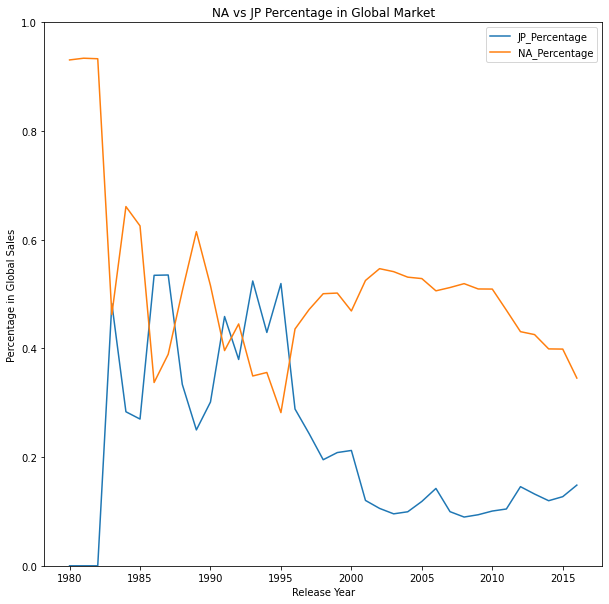

In [24]:
Grouped2=Fdf.groupby('Year_of_Release').sum().reset_index()
Grouped2['JP_Percentage']=(Grouped2['JP_Sales']/Grouped2["Global_Sales"])
Grouped2['NA_Percentage']=(Grouped2['NA_Sales']/Grouped2["Global_Sales"])
Grouped2=Grouped2.loc[Grouped2['Year_of_Release']<2017]
Grouped2.plot(kind='line',x='Year_of_Release',y=['JP_Percentage','NA_Percentage'],title="NA vs JP Percentage in Global Market",figsize=(10,10))
plt.savefig('Output_Data/NA vs JP Percentage in Global Market')
plt.xlabel('Release Year')
plt.ylabel('Percentage in Global Sales')
plt.ylim(0,1)
plt.show()

In [25]:
lgame=Odf.loc[Odf['Year_of_Release']==2016]
lgame.head(10).to_csv('Output_Data/2016 top 5 games.csv')

In [26]:
twitch_path='../Cleaned_Data/Cleaned_Twitch_Data_without_time.csv'
Tdf=pd.read_csv(twitch_path)
Tdf

,Name,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
0,7 Days to Die,53420415,734970,14165,461557,72976,6495,745.27,0.07,0.19
1,APB Reloaded,277614,17386,37,1073,399,15,25.83,0.02,0.04
2,Alien: Isolation,6969074,266707,1980,71724,9490,446,426.90,0.83,2.39
3,Animal Crossing: New Leaf,117314,13805,16,160,163,1,83.86,2.03,9.16
4,Ape Escape,466182,301396,19,118,626,0,1655.03,0.71,1.67
...,...,...,...,...,...,...,...,...,...,...
381,Yakuza Kiwami,1833284,72869,137,2514,2534,27,1766.02,0.00,0.28
382,Ys VIII: Lacrimosa of Dana,202881,5146,22,143,282,4,67.72,0.00,0.09
383,Yu-Gi-Oh! Forbidden Memories,343855,2839,49,257,462,5,81.85,1.37,1.88
384,Zelda II: The Adventure of Link,181560,94715,12,100,244,1,243.05,2.19,4.38


The r-value is 0.9062407195127951


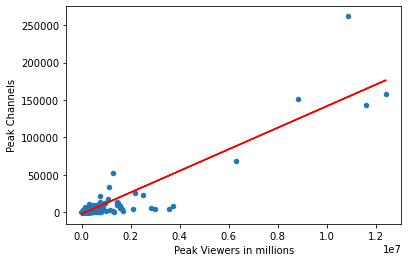

In [27]:
Tdf.plot(kind='scatter',x='Peak_viewers',y='Peak_channels')
x=Tdf['Peak_viewers']
y=Tdf['Peak_channels']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.xlabel('Peak Viewers in millions')
plt.ylabel('Peak Channels')
print(f'The r-value is {rvalue}')
plt.savefig('Output_Data/Peak viewer vs. Peak channel.png')
plt.show()

The r-value is 0.9194869233876911


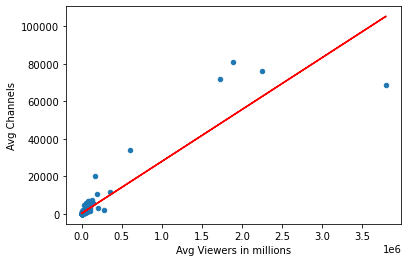

In [28]:
Tdf.plot(kind='scatter',x='Avg_viewers',y='Avg_channels')
x=Tdf['Avg_viewers']
y=Tdf['Avg_channels']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.xlabel('Avg Viewers in millions')
plt.ylabel('Avg Channels')
print(f'The r-value is {rvalue}')
plt.savefig('Output_Data/Avg viewer vs. Avg channel.png')
plt.show()

In [29]:

Tdf=Tdf.sort_values(by='Avg_viewers',ascending=False)
Tdf.head()

,Name,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
123,Grand Theft Auto V,2767974487,11609130,143185,5661506,3799513,68610,2834.32,23.84,56.57
374,World of Warcraft,1644337720,10861829,261839,3628667,2254492,75850,1883.71,0.08,6.29
203,Minecraft,1376338454,12427868,157790,8318936,1890333,80810,1379.27,11.28,24.16
223,Overwatch,1254158601,8813361,150785,6677393,1720701,71950,1635.78,1.69,3.73
262,Rocket League,438347751,6306138,69150,5195474,601852,33786,1182.03,0.09,0.67


In [30]:
Tdf=Tdf.sort_values(by='Global_Sales',ascending=False)
Tdf.head()

,Name,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
123,Grand Theft Auto V,2767974487,11609130,143185,5661506,3799513,68610,2834.32,23.84,56.57
296,Super Mario Bros.,488591,373772,26,580,656,2,419.54,32.48,45.31
316,Tetris,2109225,76013,224,8380,3098,41,123.78,26.17,35.84
28,Call of Duty: Black Ops,668363,47947,283,8256,904,51,52.67,17.57,30.82
33,Call of Duty: Modern Warfare 3,104351,8633,22,1168,140,5,25.80,15.54,30.59
